In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [23]:
def cm_plot(y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cmn, cmap='Blues', annot=True, fmt='.2f')
    sns.set(font_scale=1.3)
    plt.title("Confusion Matrix")

    return plt.show()


In [24]:
X_train = np.load("./train_x.npy")
y_train = np.load("./train_y.npy")
X_test_real = np.load("./test_x.npy")


In [25]:
X_train.shape

(14667, 187)

In [26]:
X_test_real.shape

(7225, 187)

In [27]:
X_train

array([[1.        , 0.89005238, 0.60558462, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.79310346, 0.46666667, ..., 0.        , 0.        ,
        0.        ],
       [0.9222222 , 0.68148148, 0.04814815, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.91876209, 0.84912962, 0.52417797, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.97916669, 0.61174244, ..., 0.        , 0.        ,
        0.        ],
       [0.91778773, 0.70104635, 0.34230193, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
%pip install sktime

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [30]:
from sklearn.metrics import f1_score
from sktime.classification.kernel_based import RocketClassifier
rocket_classifier = RocketClassifier(num_kernels=5000, random_state=7, n_jobs=6)
rocket_classifier.fit(X_train, y_train)
y_pred_train = rocket_classifier.predict(X_train)
y_pred_test = rocket_classifier.predict(X_test)

In [31]:
print(f'F1 on train: {f1_score(y_train, y_pred_train, average="macro")}')
print(f'F1 on test: {f1_score(y_test, y_pred_test, average="macro")}')

F1 on train: 0.9333484779126489
F1 on test: 0.8428145795655333


In [32]:
print(f"Confusion matrix for train:\n {confusion_matrix(y_train, y_pred_train)}")
print(f"Confusion matrix for test:\n {confusion_matrix(y_test, y_pred_test)}")

Confusion matrix for train:
 [[8111    1    1    0    0]
 [  64  183    1    0    0]
 [  16    0  661    1    1]
 [  13    0    2   44    0]
 [   5    0    0    0  722]]
Confusion matrix for test:
 [[3981    4    4    0    0]
 [  57   72    1    0    0]
 [  25    0  288    0    1]
 [  16    0    8   20    0]
 [  14    1    2    0  347]]


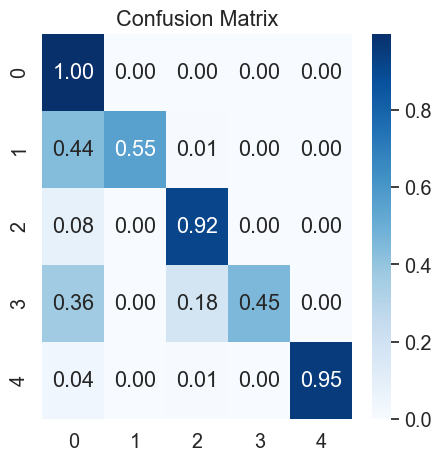

In [33]:
cm_plot(y_test, y_pred_test)

In [34]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier
shapelet_transform_classifier = ShapeletTransformClassifier(time_limit_in_minutes=180, random_state=7, n_jobs=6)
shapelet_transform_classifier.fit(X_train, y_train)
y_pred_train = shapelet_transform_classifier.predict(X_train)
y_pred_test = shapelet_transform_classifier.predict(X_test)

In [35]:
print(f'F1 on train: {f1_score(y_train, y_pred_train, average="macro")}')
print(f'F1 on test: {f1_score(y_test, y_pred_test, average="macro")}')

F1 on train: 1.0
F1 on test: 0.7497876275707442


In [36]:
print(f"Confusion matrix for train:\n {confusion_matrix(y_train, y_pred_train)}")
print(f"Confusion matrix for test:\n {confusion_matrix(y_test, y_pred_test)}")

Confusion matrix for train:
 [[8113    0    0    0    0]
 [   0  248    0    0    0]
 [   0    0  679    0    0]
 [   0    0    0   59    0]
 [   0    0    0    0  727]]
Confusion matrix for test:
 [[3866   39   54    7   23]
 [  49   75    6    0    0]
 [  54    6  245    5    4]
 [  15    0    8   20    1]
 [  26    2   10    2  324]]


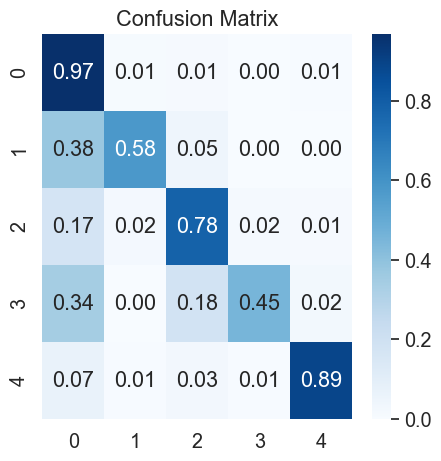

In [37]:
cm_plot(y_test, y_pred_test)

In [ ]:
# from sktime.classification.dictionary_based import BOSSEnsemble
# boss_classifier = BOSSEnsemble(random_state=7, feature_selection="chi2")
# boss_classifier.fit(X_train, y_train)
# y_pred_train = boss_classifier.predict(X_train)
# y_pred_test = boss_classifier.predict(X_test)

In [ ]:
# print(f'F1 on train: {f1_score(y_train, y_pred_train, average="macro")}')
# print(f'F1 on test: {f1_score(y_test, y_pred_test, average="macro")}')

In [ ]:
# print(f"Confusion matrix for train:\n {confusion_matrix(y_train, y_pred_train)}")
# print(f"Confusion matrix for test:\n {confusion_matrix(y_test, y_pred_test)}")

In [ ]:
# cm_plot(y_test, y_pred_test)

In [ ]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
classifier = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="euclidean", n_jobs=6)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [40]:
print(f'F1 on train: {f1_score(y_train, y_pred_train, average="macro")}')
print(f'F1 on test: {f1_score(y_test, y_pred_test, average="macro")}')

F1 on train: 1.0
F1 on test: 0.8200498034355433


In [41]:
print(f"Confusion matrix for train:\n {confusion_matrix(y_train, y_pred_train)}")
print(f"Confusion matrix for test:\n {confusion_matrix(y_test, y_pred_test)}")

Confusion matrix for train:
 [[8113    0    0    0    0]
 [   0  248    0    0    0]
 [   0    0  679    0    0]
 [   0    0    0   59    0]
 [   0    0    0    0  727]]
Confusion matrix for test:
 [[3939   19   24    2    5]
 [  53   73    2    1    1]
 [  35    7  266    3    3]
 [  12    1    6   25    0]
 [  22    0    2    0  340]]


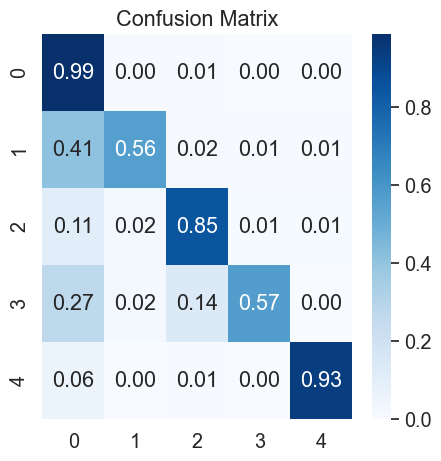

In [42]:
cm_plot(y_test, y_pred_test)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     "n_neighbors":(1, 2, 3),
#     "weights":("uniform", "distance"),
#     "algorithm":("ball_tree", "kd_tree", "brute"),
#     "distance":("euclidean", "squared", "msm")
# }
# estimator = KNeighborsTimeSeriesClassifier()
# clf = GridSearchCV(estimator, parameters, scoring="f1_macro")
# clf.fit(X_train, y_train)

# best_n_neighbors = clf.best_params_["n_neighbors"]
# best_weights = clf.best_params_["weights"]
# best_algorithm = clf.best_params_["algorithm"]
# best_distance = clf.best_params_["distance"]


In [ ]:
y_pred = rocket_classifier.predict(X_test_real)


In [ ]:
# y_pred_csv = pd.DataFrame(list(range(len(y_pred))), columns=["Id"])
y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred).astype(int).astype(str)
y_pred_csv.to_csv("testing_submission.csv", index=False)
y_pred_csv